### Prabhakara Changala
##### Techie from India

### Liner Regression

In [ ]:
# install libraries which are required for the project
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install wordcloud
!pip install scikit-learn

In [8]:
# importing required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [51]:
rent_data = pd.read_csv('D:\PrabhakaraChangala\ML-Projects\LinerRegression\House-Rent-Prediction\House_Rent_Dataset.csv')
rent_data.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [15]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [16]:
rent_data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Observations:
- There is no null value for any column in the dataset.

## Descriptive Statistics

In [24]:
rent_data.describe()
#it generates summary statistics (like mean, standard deviation, min, max, etc.) for the numeric columns in your DataFrame by default.
# as we have 4 int64 columns, it will generate summary statistics for those columns.

BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000

# Data Analysis and Visualization

## Pairplot of data

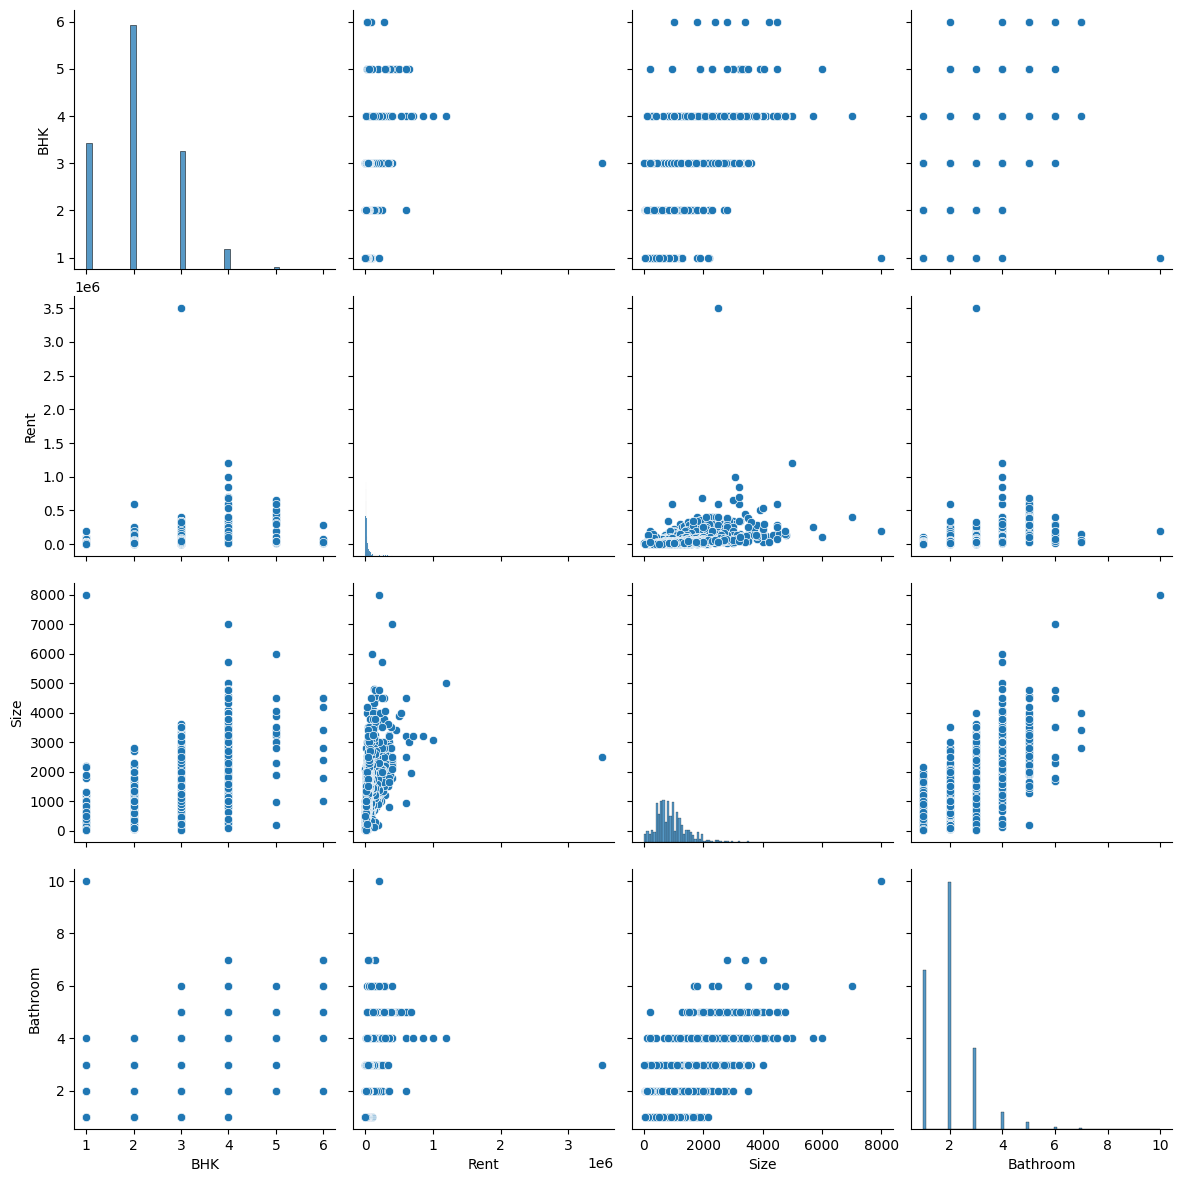

In [ ]:
sns.pairplot(rent_data,height=3)
plt.show()
# height=3 is used to set the height of the plot

In [40]:
# alternative way to plot pairplot
# Create scatter matrix
fig = px.scatter_matrix(rent_data)
fig.update_layout(width=1200, height=1200)  # Adjust size
fig.show()

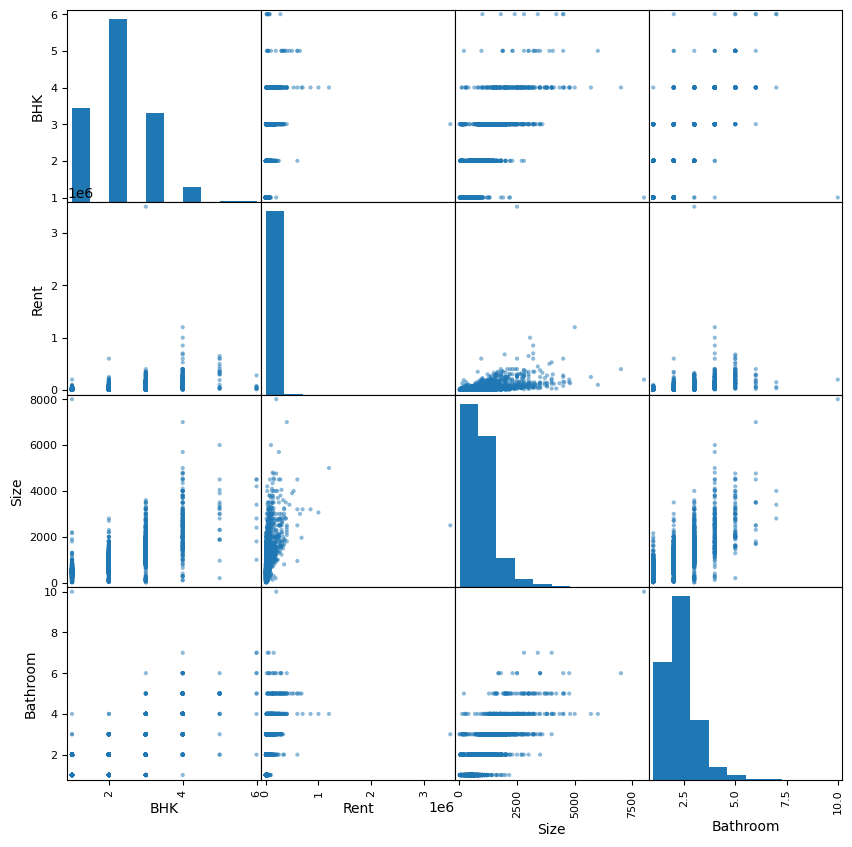

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(rent_data, figsize=(10, 10), diagonal='hist')
plt.show()

## Univariate Analysis

### Rent (Our Target Variable)
##### as we are trying to predict rent, so Rent is our target variable

In [45]:
fig = px.histogram(rent_data,x='Rent',color_discrete_sequence = px.colors.qualitative.Set2, title="Rent Prices Distribution Histogram")
fig.show()

### What does this plot represent?
The histogram will visually represent how the rent prices are distributed across your dataset. In simple terms, it will show:

#### The frequency of different rent prices: 
The x-axis will represent different rent price ranges (or bins), and the y-axis will show how many properties fall into each range.
#### The shape of the rent price distribution: 
You will be able to see if most rent prices are concentrated around a specific range, or if they are spread out across the spectrum.


For example, if most rental prices are clustered around a certain value, you would see a peak in that bin. Conversely, if the rental prices are more evenly spread out, the histogram will show a flatter distribution.

In [46]:
fig = px.box(rent_data, x="Rent", title='Boxplot for Rent Prices')
fig.show()

### What does a box plot show?
A box plot is used to summarize the distribution of a numerical dataset. Here's how to interpret it:

#### The Box:

The box represents the interquartile range (IQR), which includes the middle 50% of the data.
The lower edge of the box represents the 25th percentile (Q1), and the upper edge represents the 75th percentile (Q3).
The middle line inside the box represents the median of the data (50th percentile).
#### Whiskers:

The lines extending from the box are called whiskers. They typically extend to the maximum and minimum values within a specified range (often 1.5 times the IQR).
Any data points outside this range are considered outliers and are typically marked as individual points.
#### Outliers:

Outliers are any rent prices that fall outside the range defined by the whiskers. These will appear as individual dots above or below the whiskers in the plot.

### What does the box plot for rent prices tell you?
##### Spread of Rent Prices: 
The width of the box shows how spread out the rent prices are.
##### Central Tendency: 
The median line inside the box shows the typical rent price (i.e., the middle rent price when sorted).
##### Outliers: 
Any rent prices that are significantly higher or lower than the rest of the data will be shown as outliers.


For example, if you see a large gap between the lower and upper quartiles or extreme outliers, it could indicate a significant variation in the rent prices in your dataset.

This plot is especially useful for detecting skewness or identifying any unusual rent values.

#### Observations:
- There is one outlier so far out of the inter-quantile range.

#### Actions:
- To remove outlier, as it may affect our assumptions about other variables and analysis

### Checking the position of Outlier

In [52]:
print(np.where(rent_data['Rent']>3000000))
# or print(np.where(rent_data['Rent']>2000000))

(array([1837], dtype=int64),)


#### Observations:
- Outlier's position is at 1837th position in a dataframe.

### Deleting the Outlier

In [57]:
# rent_data = pd.read_csv('D:\PrabhakaraChangala\ML-Projects\LinerRegression\House-Rent-Prediction\House_Rent_Dataset.csv')
rent_data.drop([1837], axis=0, inplace=True) # Deleting the Outlier

fig = px.box(rent_data, x="Rent",title='Boxplot for Rent Prices')
fig.show()

# secondtime, this will give error as we already deleted the outlier
# run the rent_data again and then run the code

### BHK

In [60]:
rent_data['BHK'].value_counts()
# showing the count of each unique value in the column

BHK
2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: count, dtype: int64

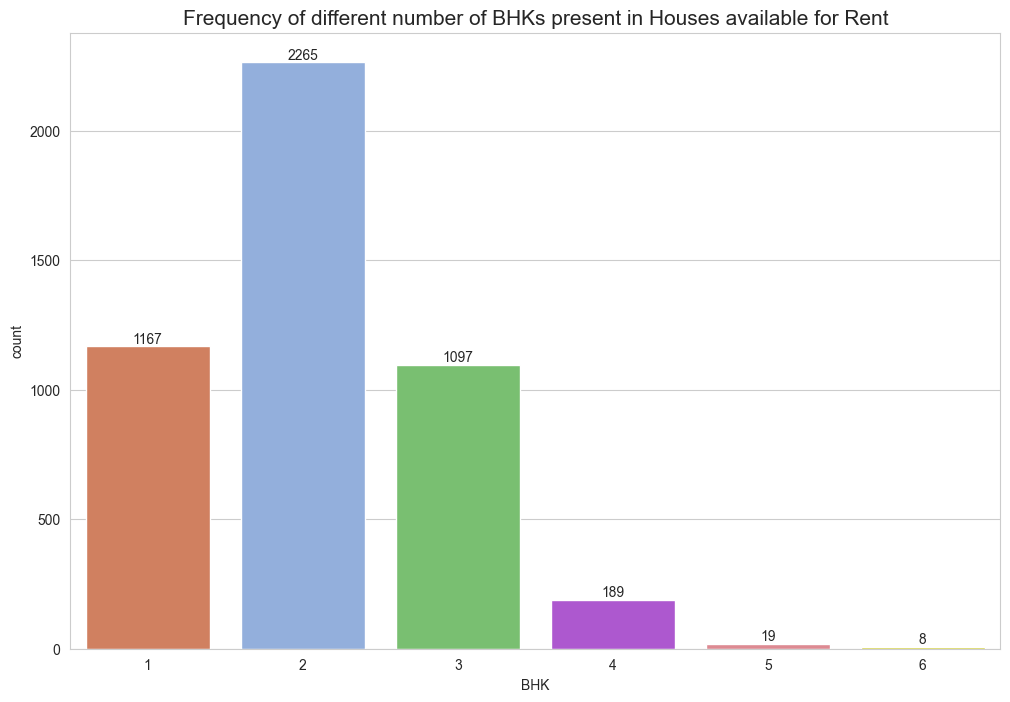

In [63]:
sns.set_style('whitegrid')
# set_style is used to set the background of the plot
fig,axes = plt.subplots(figsize=(12,8))
# subplots is used to create a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created.
# figsize is used to set the size of the plot
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']
# colors is used to set the color of the plot

ax = sns.countplot(x='BHK',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
# countplot is used to show the counts of observations in each categorical bin using bars.
# loop to add the count at the top of the bar
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of BHKs present in Houses available for Rent',fontsize=15)
plt.show()
# show is used to display the plot

In [64]:
#pie chart for BHK column in the dataset using plotly express library
fig = px.pie(rent_data, names='BHK', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of BHKs present in Houses available for Rent')
# height and width are used to set the size of the plot
# color_discrete_sequence is used to set the color of the plot
# title is used to set the title of the plot
fig.update_traces(textfont_size=15)
# update_traces is used to set the font size of the text
fig.show()
# show is used to display the plot

#### Observations:
- Mostly 2 BHK house are rented the most, as it is mostly under budget for the people and can be rented soon.
- 5 and 6 BHK house are put less for rent, because there is very less demand for such big spacious houses in India. 

### Bathroom

In [65]:
rent_data['Bathroom'].value_counts()

Bathroom
2     2291
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

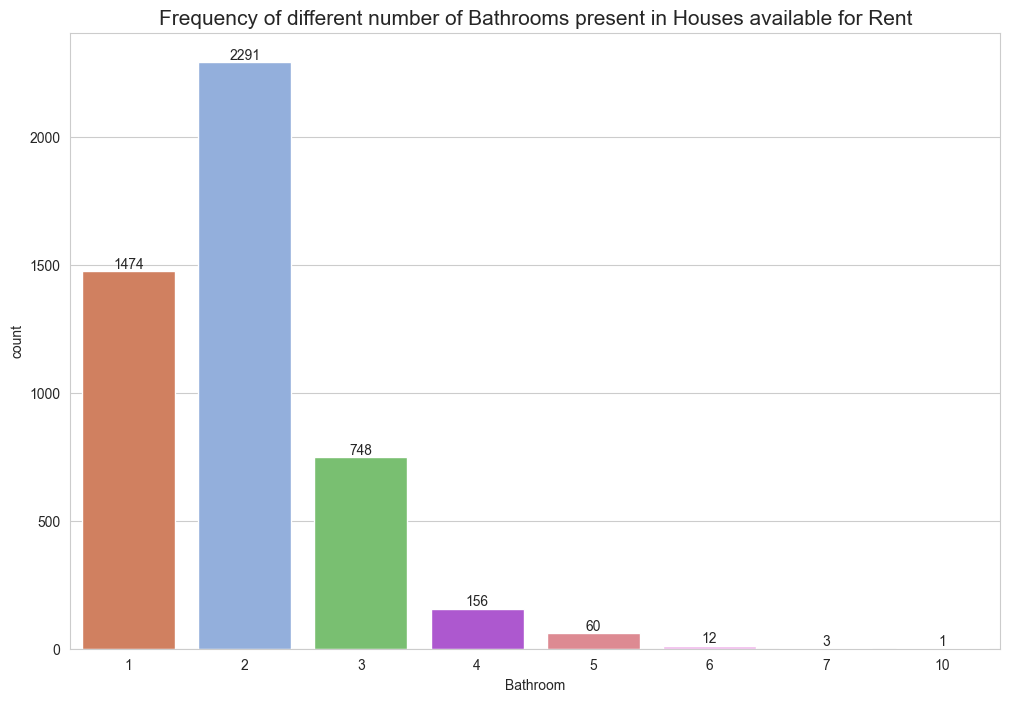

In [66]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

ax = sns.countplot(x='Bathroom',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='Bathroom', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of Bathrooms present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- House with 2 Bathrooms are most common for the houses put up on rent.
- Houses with 7 and 10 bathroom quite seems inappropriate and not much of use.

### City

In [67]:
rent_data['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

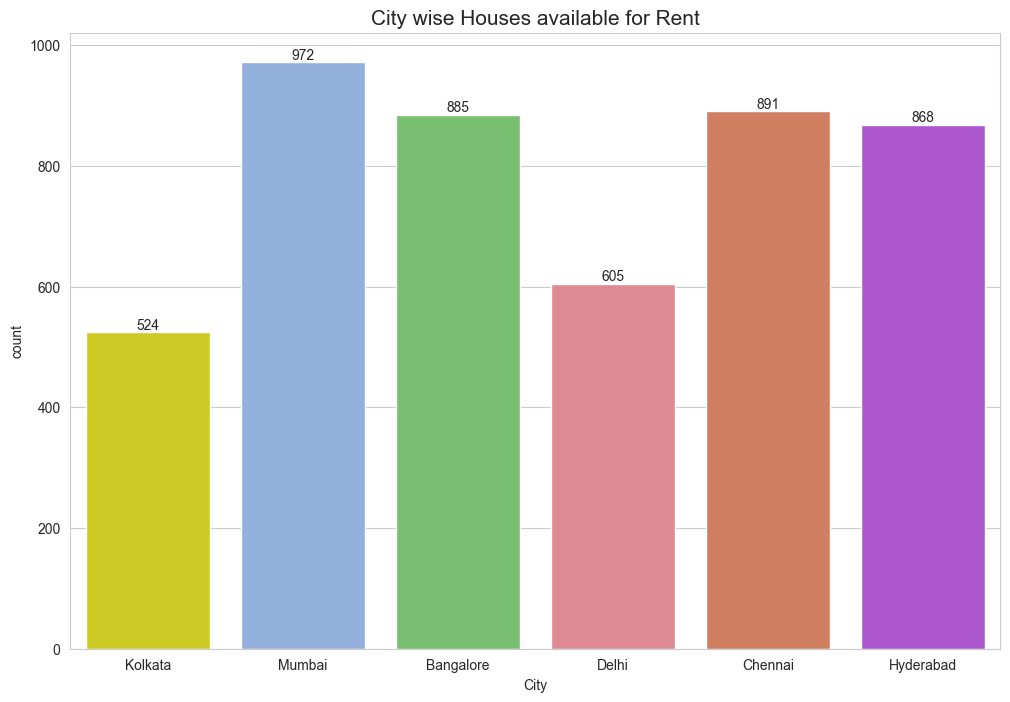

In [68]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=rent_data, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City wise Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- Mumbai, followed by Chennai and Hyderad has most number of rented houses, seems like there is very high demand considering the job corporates and other factors.

### Area Type

In [69]:
rent_data['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2297
Built Area        2
Name: count, dtype: int64

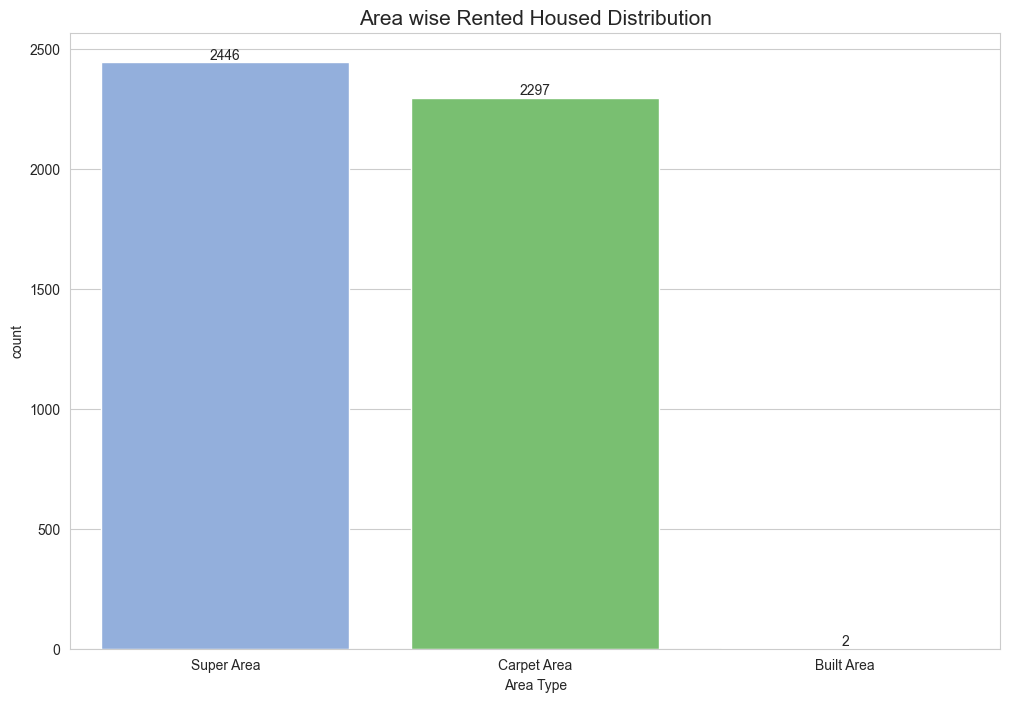

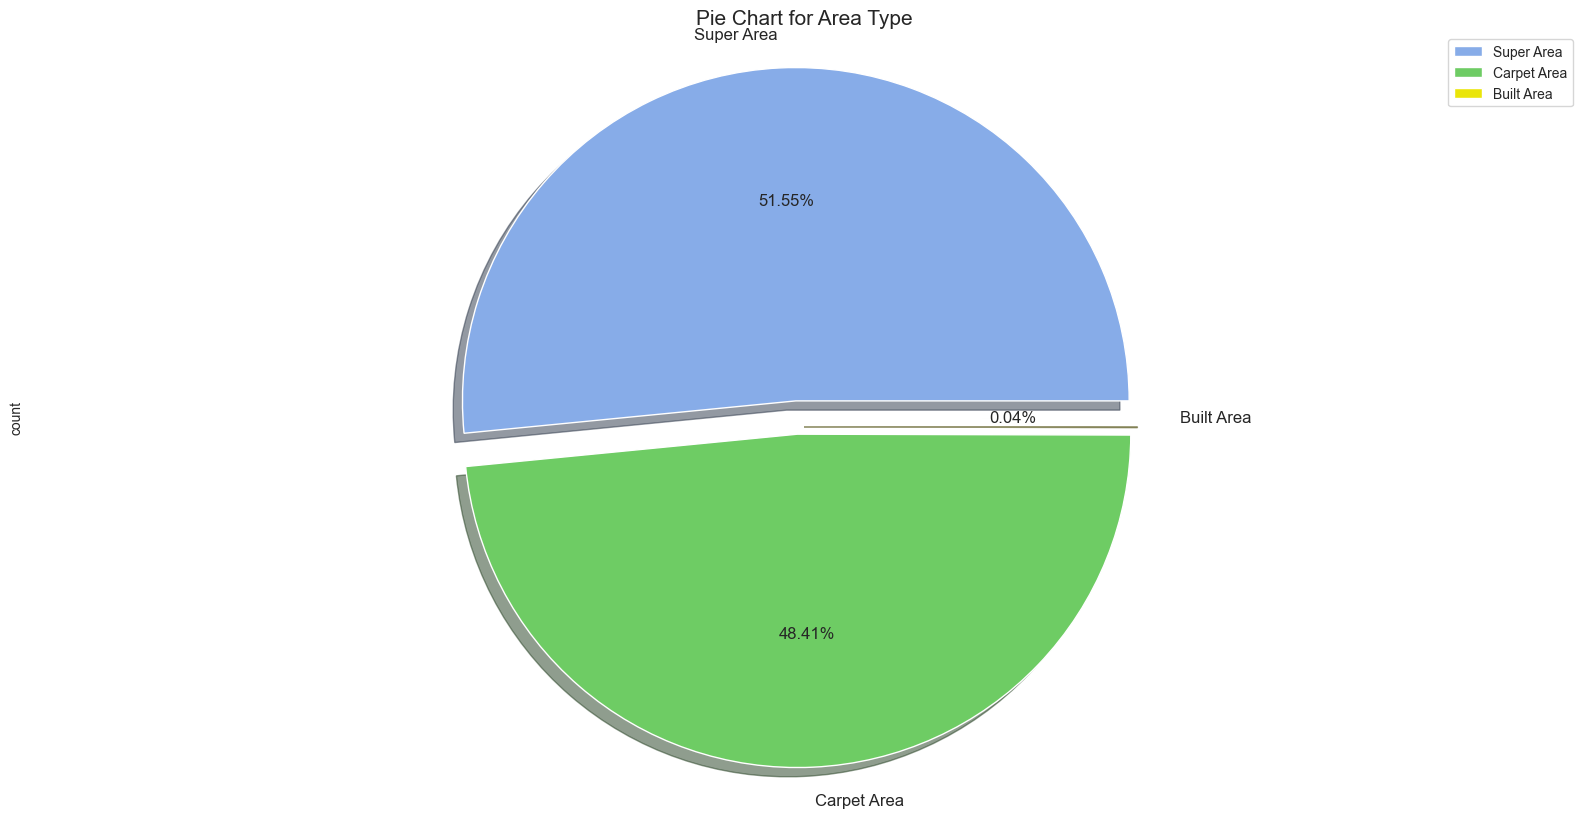

In [70]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Area Type',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area wise Rented Housed Distribution',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Super area houses are more put up on rent.
- Built Area wise rented houses are very less.

### Point of Contact

In [71]:
rent_data['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: count, dtype: int64

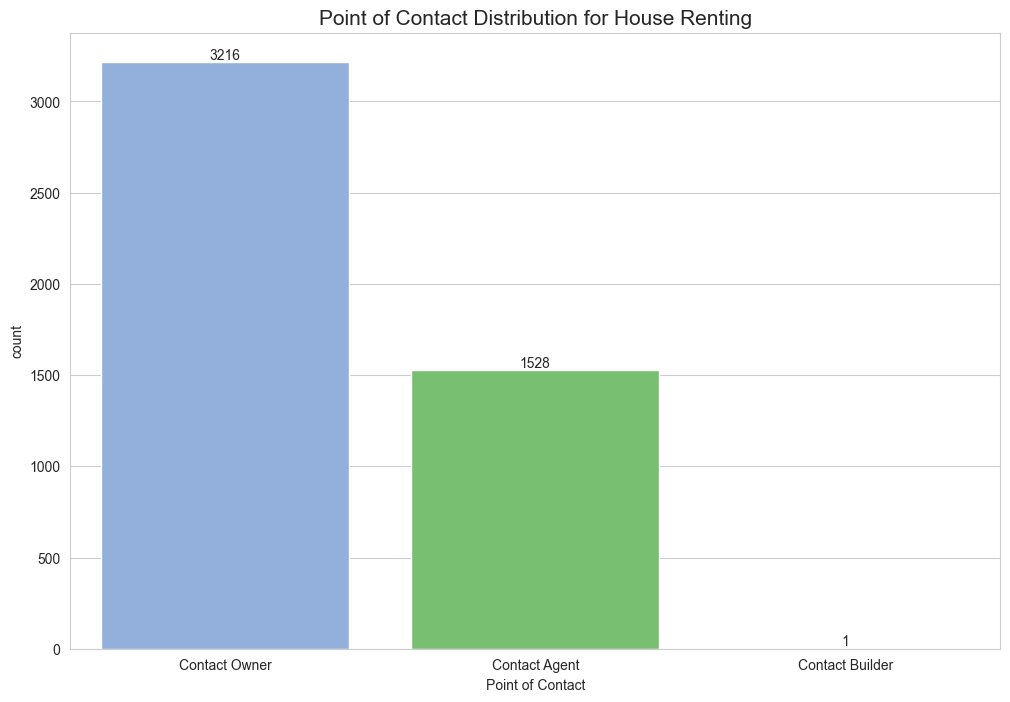

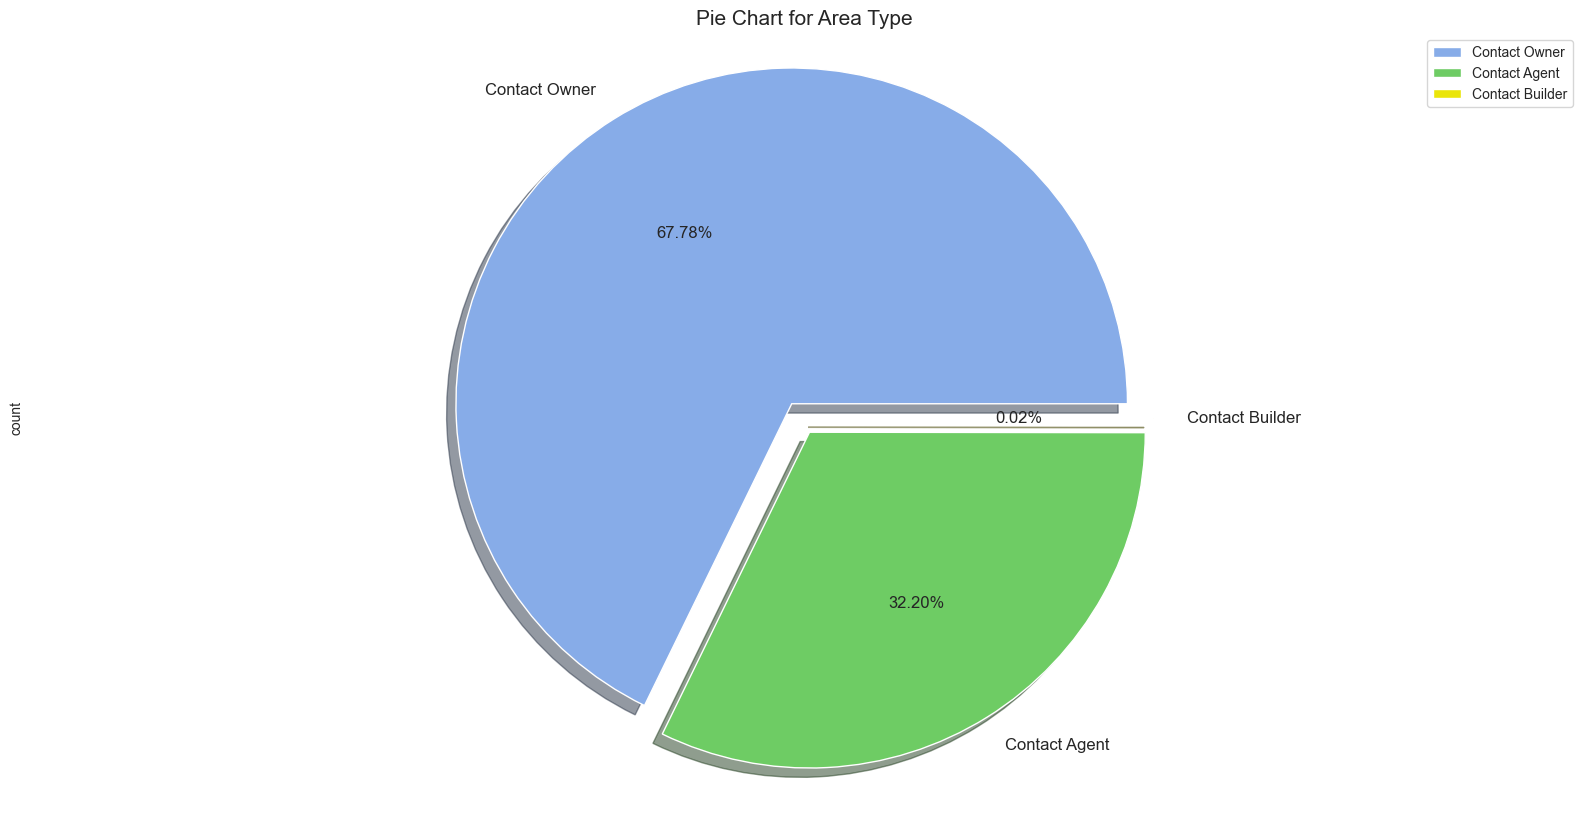

In [72]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Point of Contact',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Point of Contact Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Contact wise most have put the contact of owner only, as it directly more helps with negotiation and verification.

### Tenant Preferred

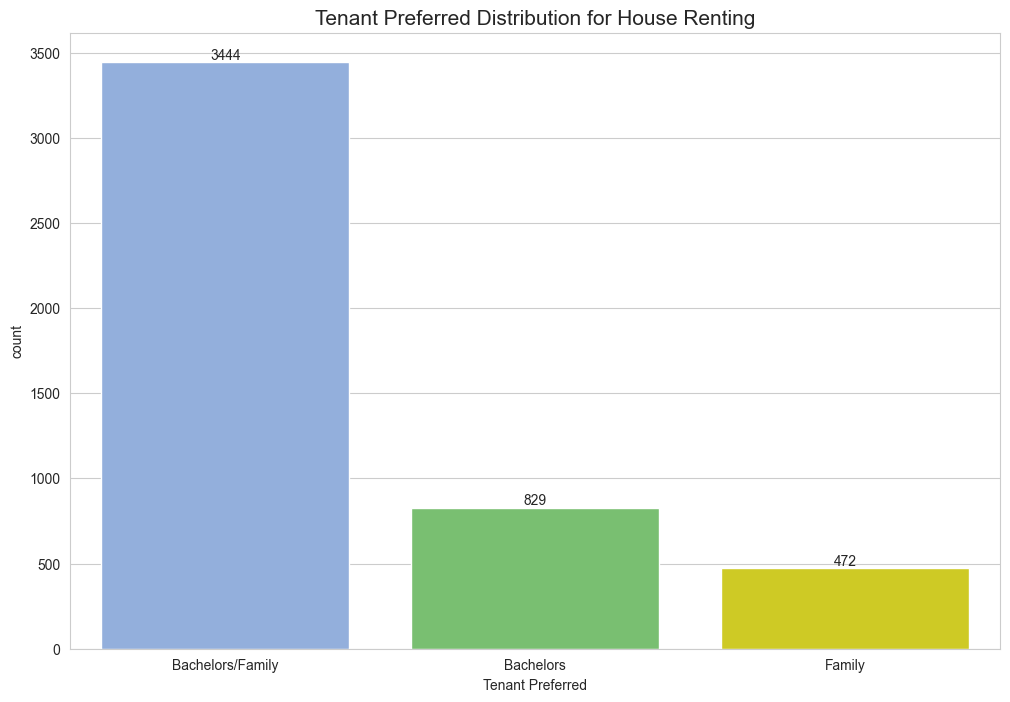

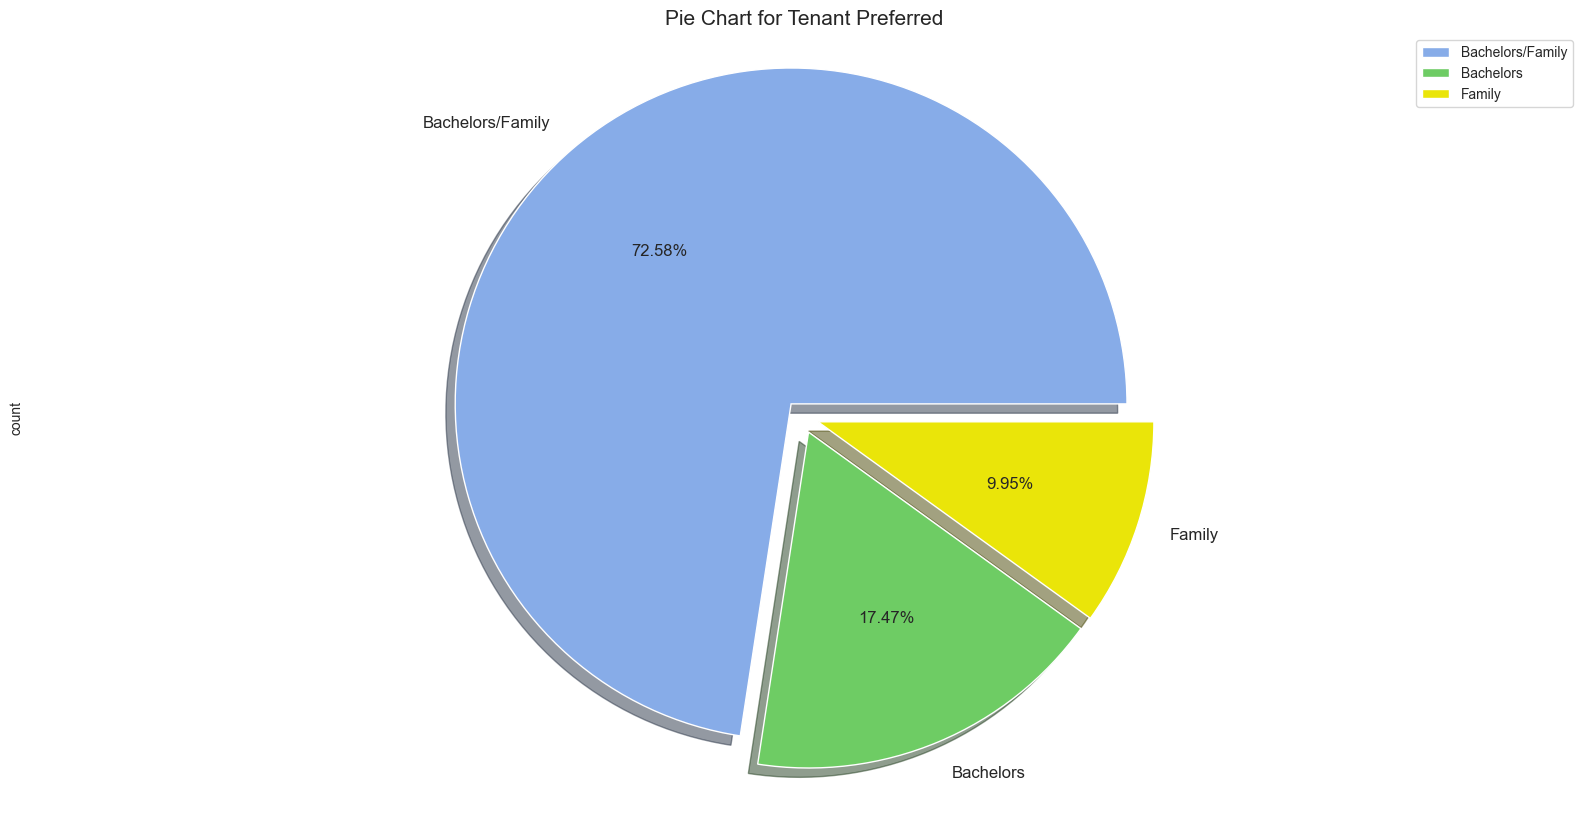

In [73]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Tenant Preferred',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenant Preferred Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- It seems most rented houses have no special category. They are okay with both Bachelors and Family.

### Furnishing Status

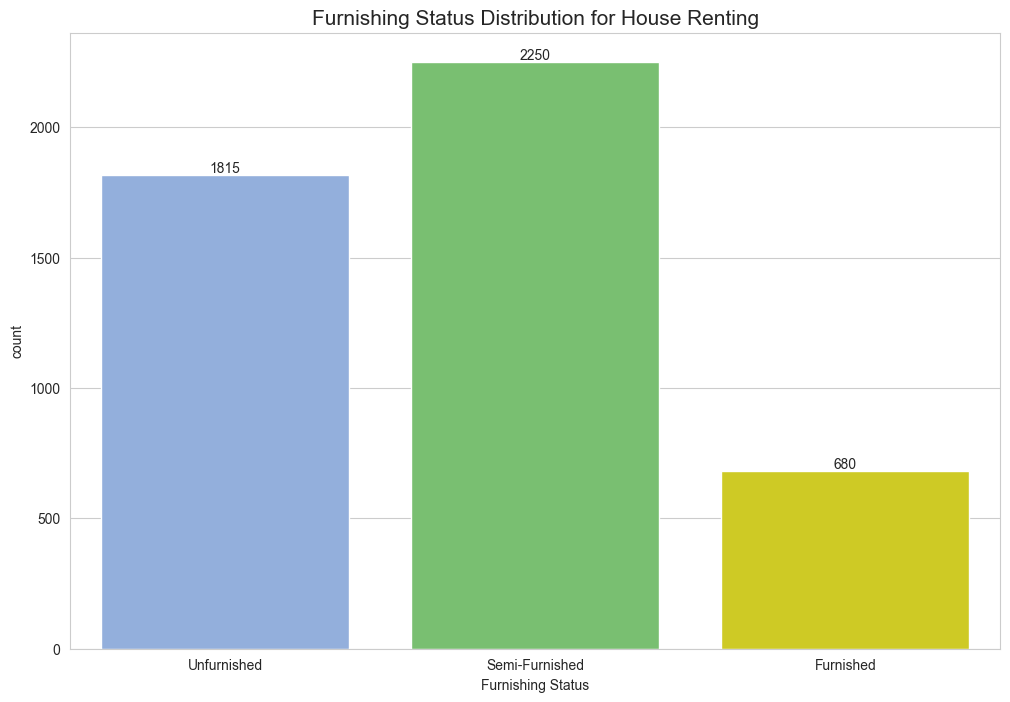

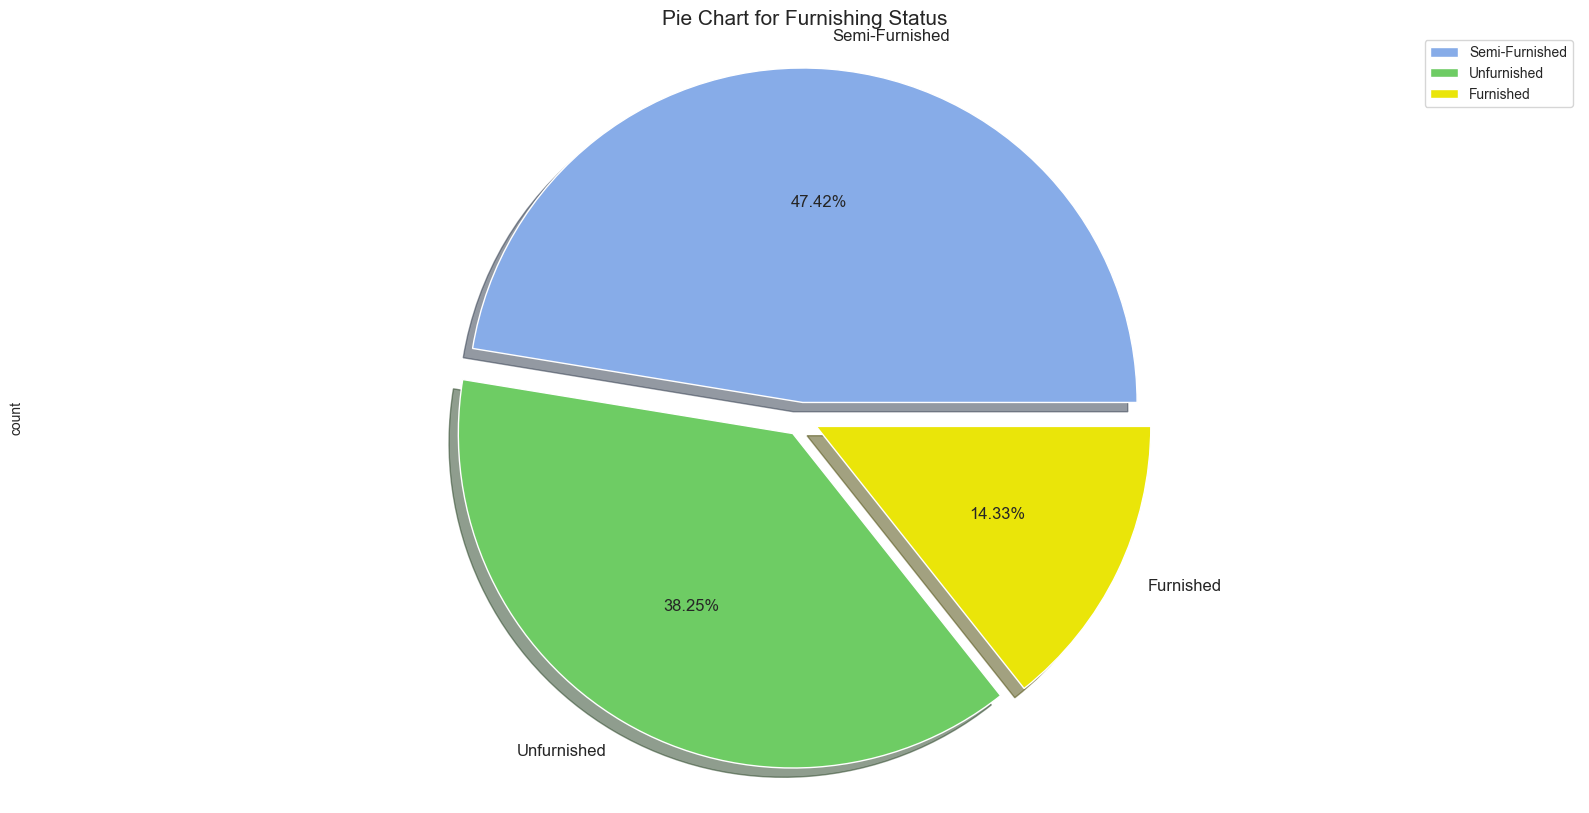

In [74]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Furnishing Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Furnishing Status',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Most Rented Houses are semi-furnished.
- Also cost wise these houses will be quite good to stay and pocket friendly.

## Size

In [75]:
fig = px.histogram(rent_data, x="Size", title='Size Distribution')
# histogram is used to plot the histogram for the column
fig.show()
fig = px.box(rent_data, x="Size", title='Boxplot for Size')
# boxplot is used to plot the boxplot for the column
fig.show()

#### Observations:
- The smallest house rented has size of about 10 sq. feet.
- The biggest house rented has size of about 8000 sq. feet.
- The median of house rented has size of about 850 sq. feet.

## Bivariate Analysis

### BHK and Rent distribution

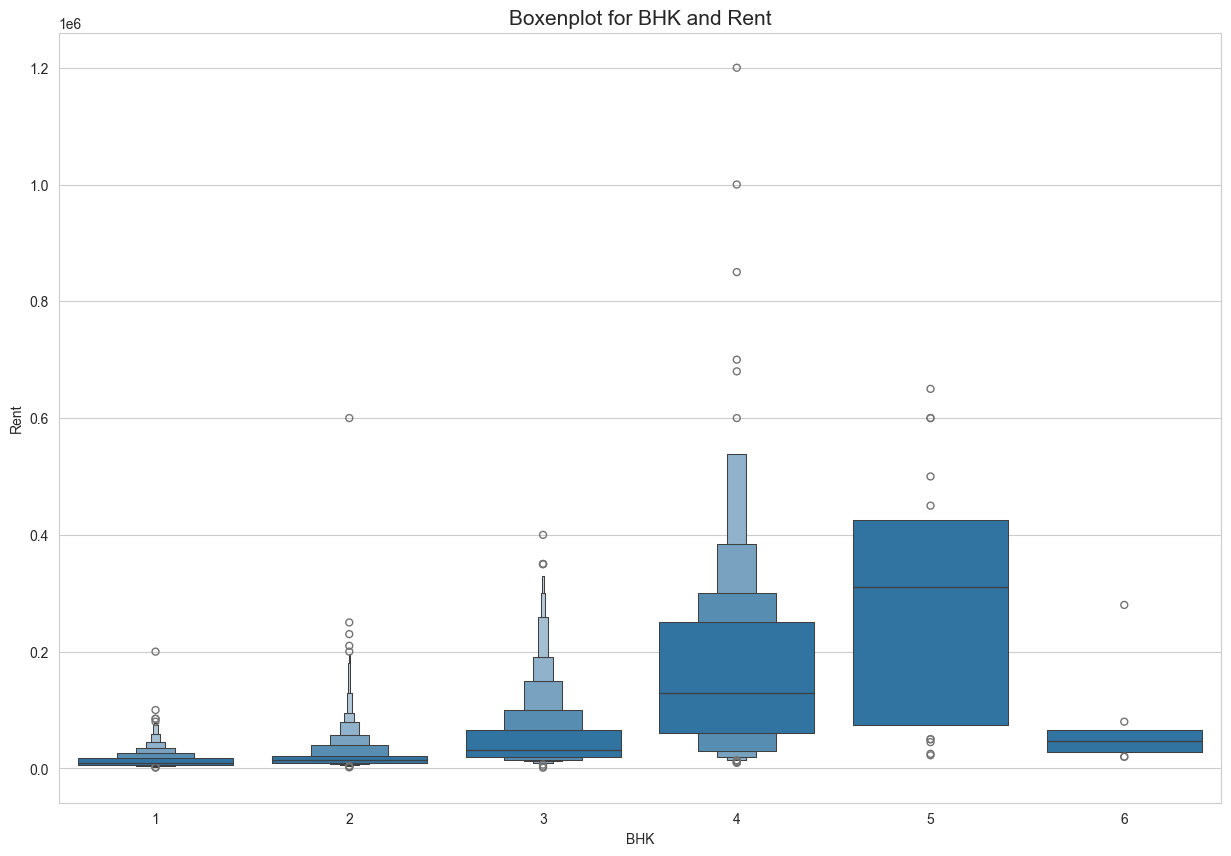

In [76]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=rent_data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

#### Obseervations:
- The rent of the houses is subsequently increasing with increase in BHK.
- For 6 BHK, things doesn't seem feasible and they are less in demand so rent is very less.

### Bathroom and Rent distribution

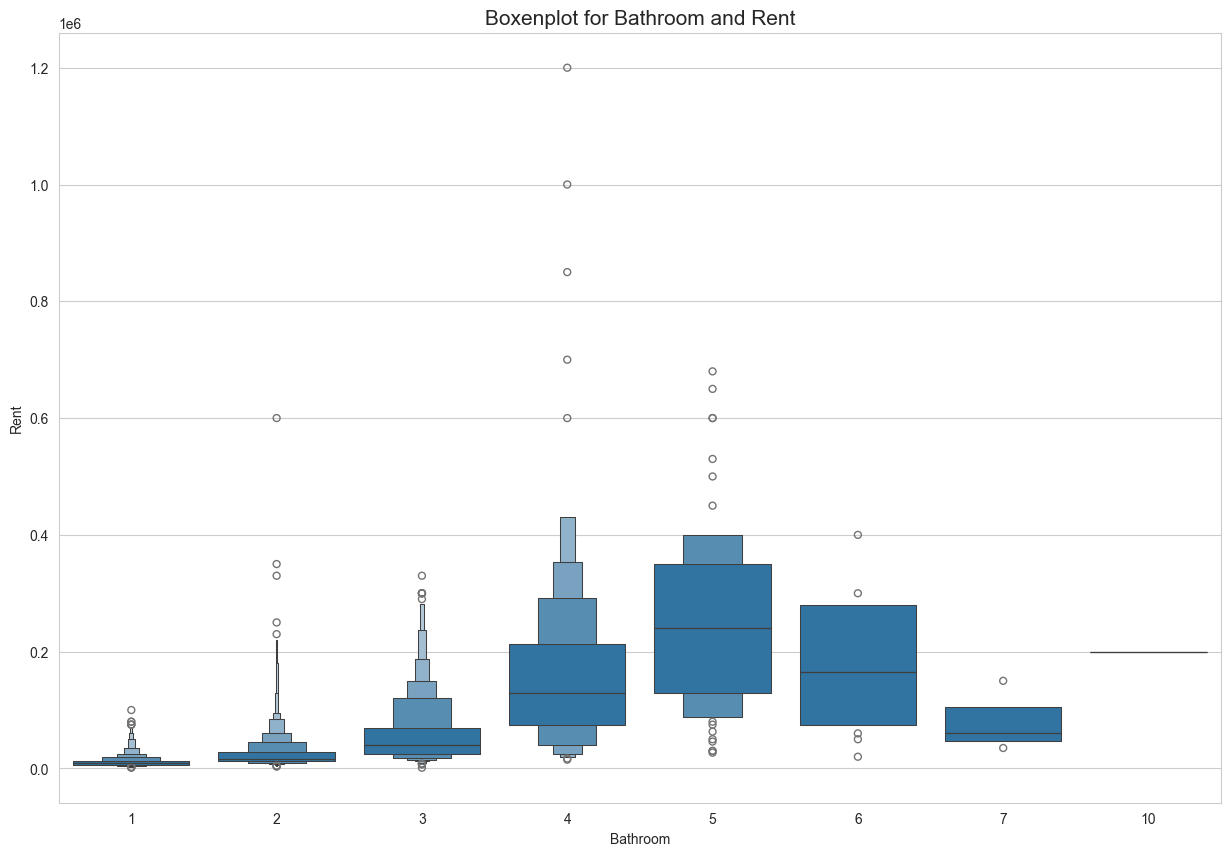

In [77]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y='Rent',data=rent_data)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

#### Observations:
- The House rent is increasing with increase in bathrooms in house.
- But having more than 4-5 bathrooms in a house doesn't seem good or feasible, so they are less in demand and that's why there rent is less.

### Area Type and Rent Distribution

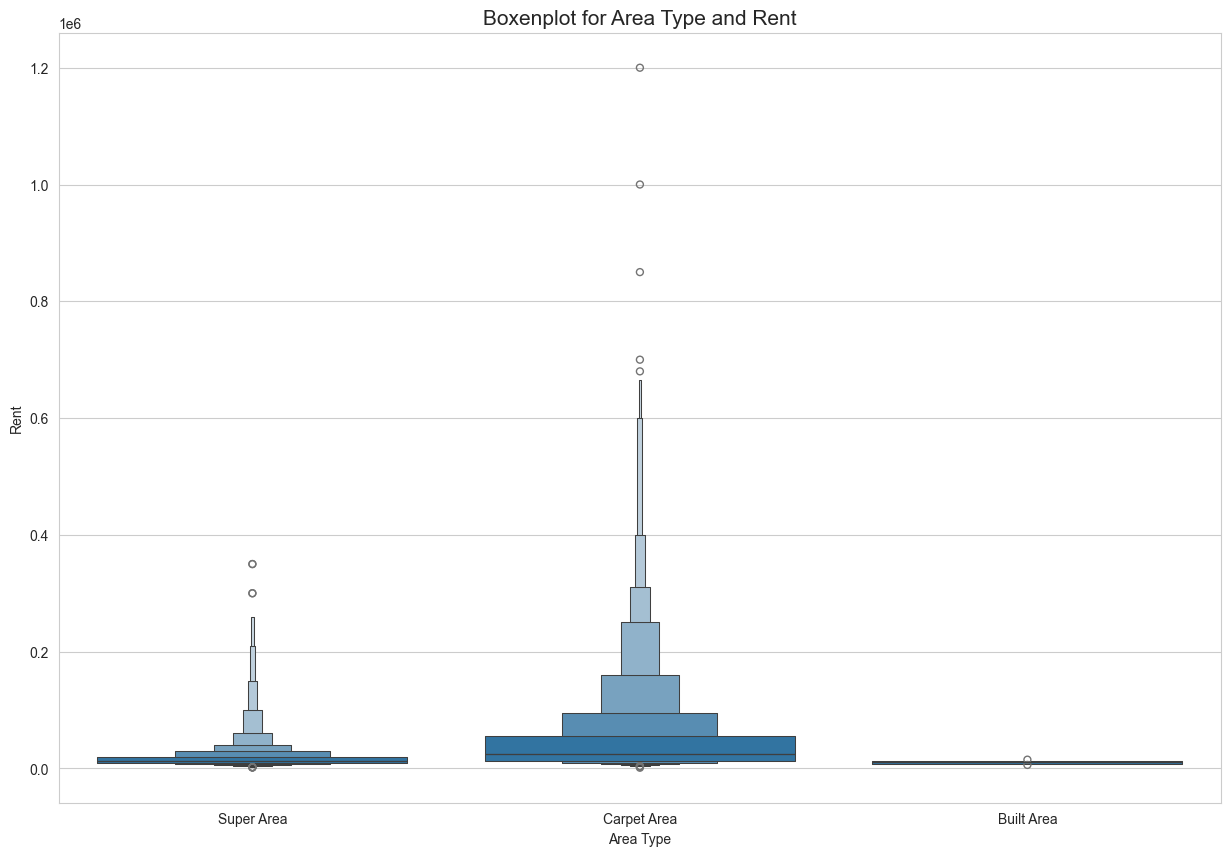

In [78]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y='Rent',data=rent_data)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses with Carpet Area have more rent as compared to Super Area.
- Built Area are less in demand , so rent is kept less.

### City and Rent Distribution

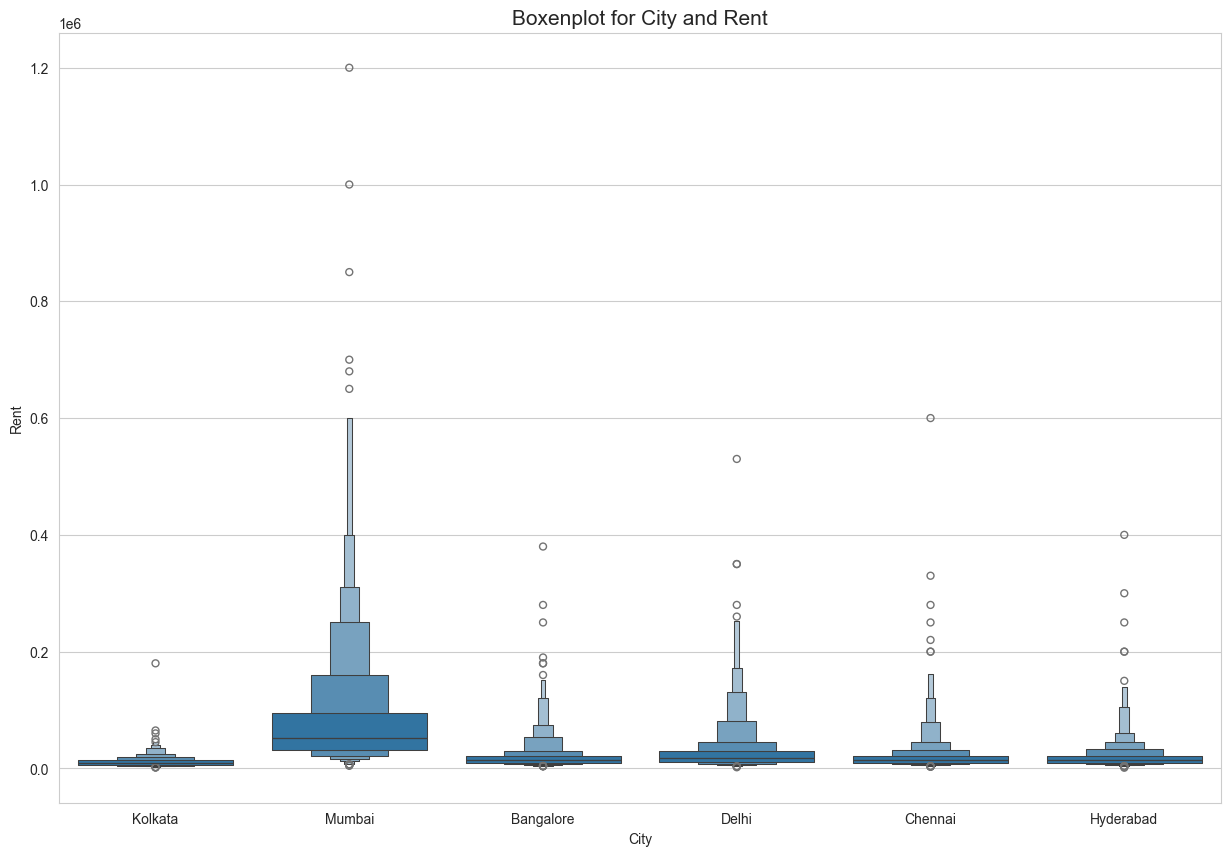

In [80]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="City", y='Rent',data=rent_data)
plt.title('Boxenplot for City and Rent',fontsize=15)
plt.show()

#### Observations:
- Seems Mumbai is having too much demand for houses, so rent is also very high. The immigrations of job corporates to Mumbai is high. This could be one of the reason of more demand in rented houses.
- All other cities except Kolkata are having fair equal amount of rent. 
- Kolkata is not very much flourised in terms of job sectors and lifestyle as compared to other cities. Moreover it is also less developed compared to them. So demand is less there, so rent is also less.

### Furnishing Status and Rent Distribution

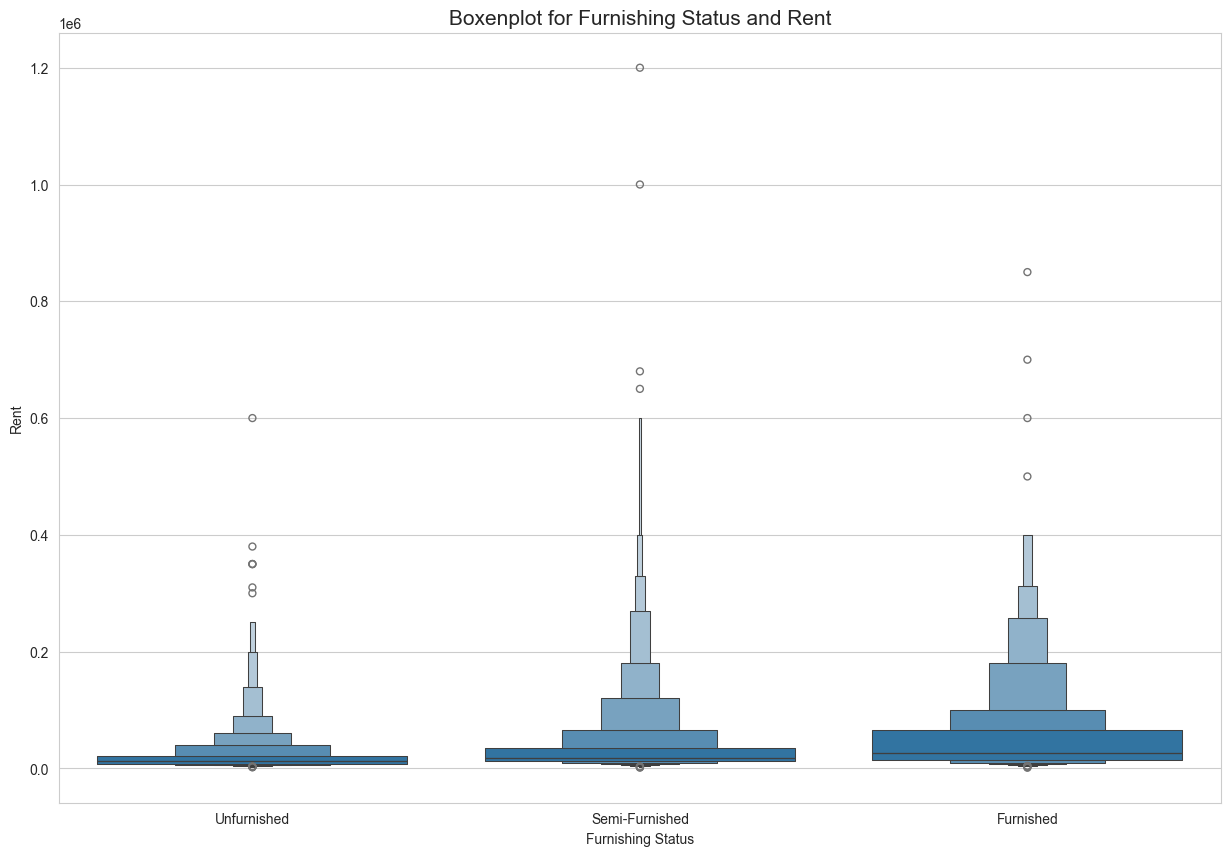

In [81]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y='Rent',data=rent_data)
plt.title('Boxenplot for Furnishing Status and Rent',fontsize=15)
plt.show()

#### Observations:
- Unfurnished houses for rent are having less rent as compared to others.

### Tenant Preferred and Rent Distribution

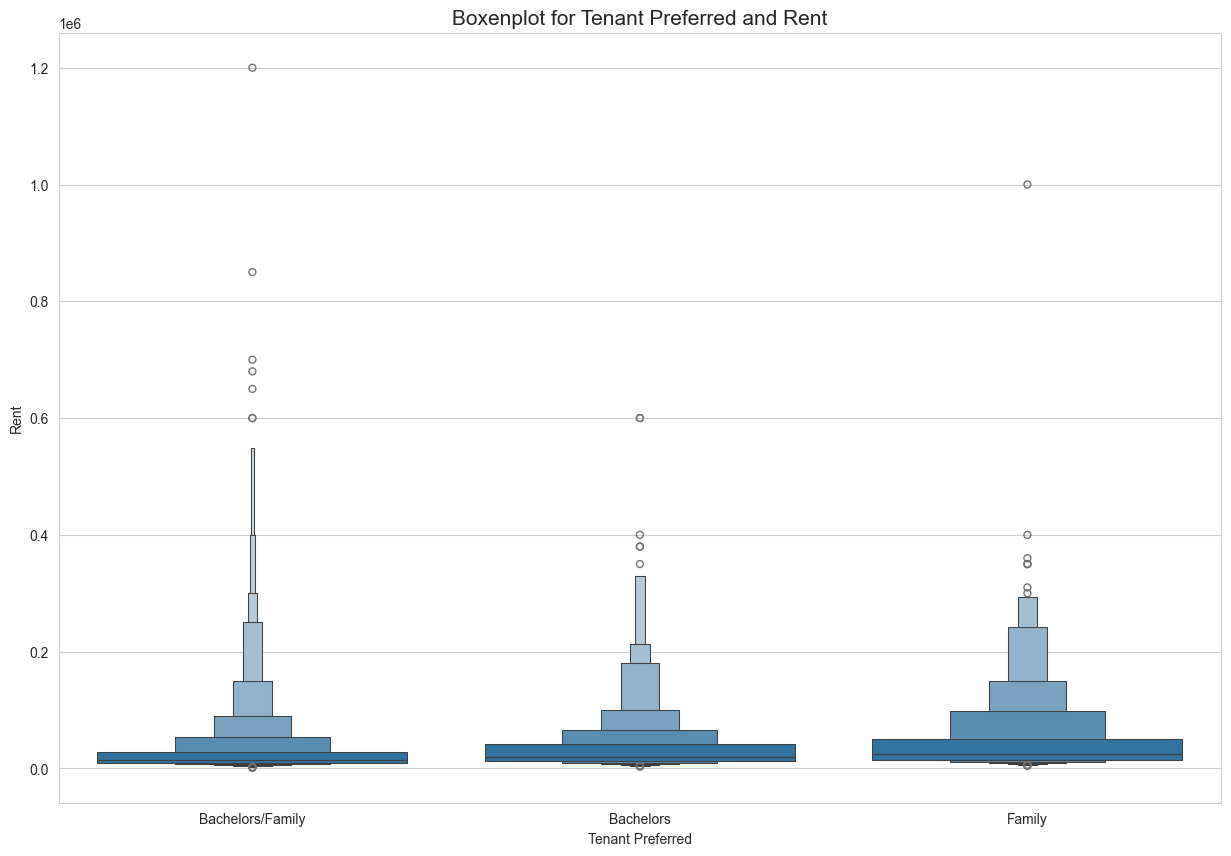

In [83]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=rent_data)
# boxenplot is used to plot the boxenplot for the columns
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses rented with no tenant conditions are having a bit more rent as compared to others.

### Point of Contact and Rent Distribution

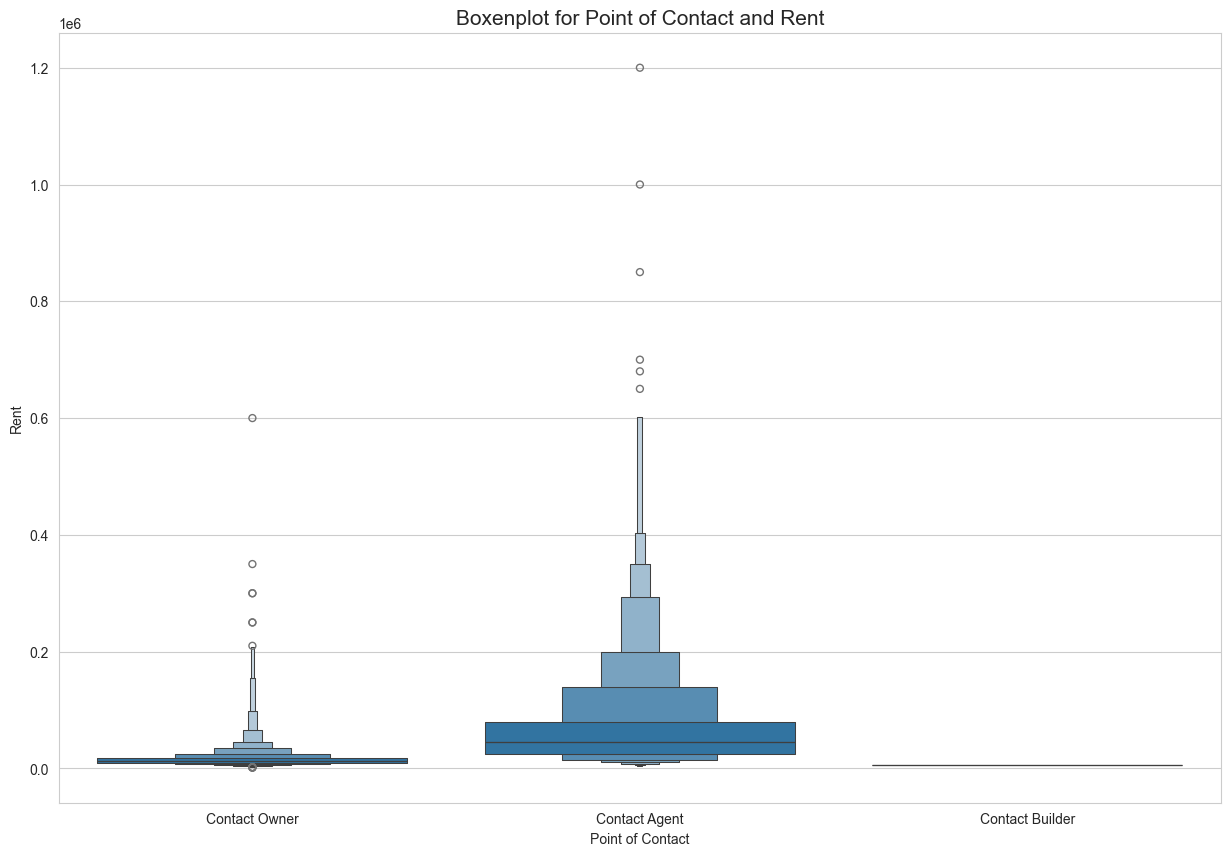

In [84]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y='Rent',data=rent_data)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

#### Observations:
- As having a contact agent to get you a house rented also involves paying him/her. So this could be one of the reason that rent for Contact Agent pount of contact is bit high to compensate that.
- Directly contacting Builder involves less rent.

### Sunburst Chart

In [85]:
fig = px.sunburst(rent_data, path=['City','Area Type', 'Furnishing Status', 'Tenant Preferred'], width=900,
    height=900,title='Allotment of flats according to Bachelors/Family/(Bachelors/Family)',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()

<div class="alert alert-block alert-info"> 📌 Hover over various sections of chart, and click on it to get more clear insights.</div>

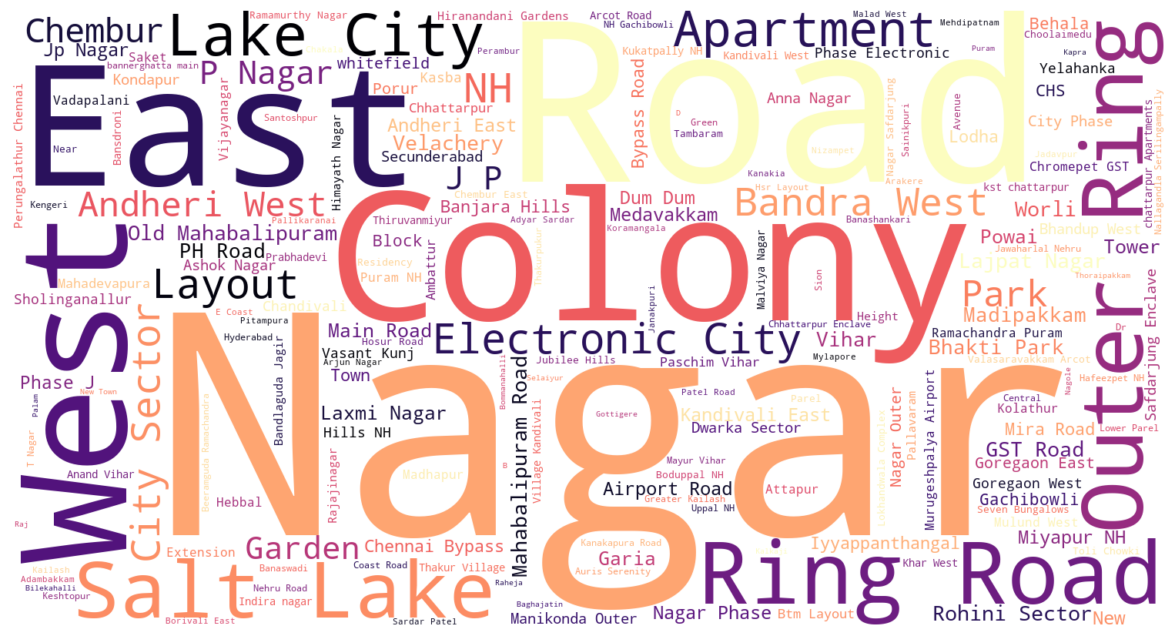

In [86]:
text = " ".join(area for area in rent_data["Area Locality"])
wordcloud = WordCloud(background_color="white", 
                      max_words=200,
                      width=1500, 
                      height=800,
                      colormap="magma" ).generate(text)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Heatmap of Correlation

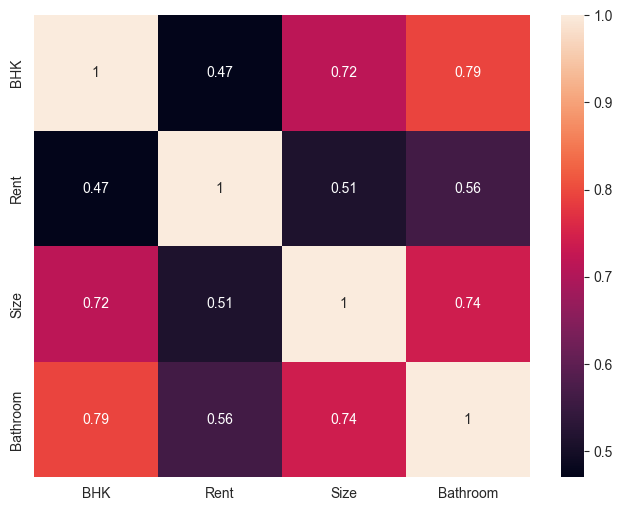

In [90]:
numeric_data = rent_data.select_dtypes(include=['number'])
corr = numeric_data.corr()
# ValueError: could not convert string to float: '2022-05-18'
# this error will come when we have date columns in the dataset
# so we need to remove the date columns from the dataset
# if we have any date columns in the dataset
#include=['number'] is used to include the numeric columns in the dataset
plt.subplots(figsize=(8,6))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

In [91]:
##Dropping unnecesaary columns from dataset
rent_data = rent_data.drop(['Posted On','Area Locality','Floor'],axis=1)
# drop is used to drop the columns from the dataset, which aare not required
rent_data.head()

BHK   Rent  Size    Area Type     City Furnishing Status  Tenant Preferred  \
0    2  10000  1100   Super Area  Kolkata       Unfurnished  Bachelors/Family   
1    2  20000   800   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
2    2  17000  1000   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
3    2  10000   800   Super Area  Kolkata       Unfurnished  Bachelors/Family   
4    2   7500   850  Carpet Area  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [92]:
rent_data = pd.get_dummies(rent_data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent_data.head()

BHK   Rent  Size  Bathroom  Area Type_Built Area  Area Type_Carpet Area  \
0    2  10000  1100         2                 False                  False   
1    2  20000   800         1                 False                  False   
2    2  17000  1000         1                 False                  False   
3    2  10000   800         1                 False                  False   
4    2   7500   850         1                 False                   True   

   Area Type_Super Area  City_Bangalore  City_Chennai  City_Delhi  ...  \
0                  True           False         False       False  ...   
1                  True           False         False       False  ...   
2                  True           False         False       False  ...   
3                  True           False         False       False  ...   
4                 False           False         False       False  ...   

   City_Mumbai  Furnishing Status_Furnished  Furnishing Status_Semi-Furnished  \
0        False                        False                             False   
1        False                        False                              True   
2        False                        False                              True   
3        False                        False                             False   
4        False                        False                             False   

   Furnishing Status_Unfurnished  Tenant Preferred_Bachelors  \
0                           True                       False   
1                          False                       False   
2                          False                       False   
3                           True                       False   
4                           True                        True   

   Tenant Preferred_Bachelors/Family  Tenant Preferred_Family  \
0                               True                    False   
1                               True                    False   
2                               True                    False   
3                               True                    False   
4                              False                    False   

   Point of Contact_Contact Agent  Point of Contact_Contact Builder  \
0                           False                             False   
1                           False                             False   
2                           False                             False   
3                           False                             False   
4                           False                             False   

   Point of Contact_Contact Owner  
0                            True  
1                            True  
2                            True  
3                            True  
4                            True  

[5 rows x 22 columns]

# Modeling

In [93]:
X = rent_data.drop('Rent',axis=1)
y = rent_data['Rent']

## Splitting into Train and Test dataset

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
# train_test_split is used to split the dataset into train and test datasets

## Scaling the data

In [95]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
# reshape is used to reshape the data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
# StandardScaler is used to scale the data
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
# fit_transform is used to fit the data and then transform the data

In [96]:
print(X_train,y_train)

[[-1.29973557 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292  0.36670492  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 ...
 [-0.10471292 -0.18307009  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.96846295 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.81138438  0.04443349 ...  1.45846448 -0.01735525
  -1.45745561]] [[-0.42245895]
 [-0.39738427]
 [-0.3388767 ]
 ...
 [-0.1717122 ]
 [-0.4726083 ]
 [-0.15499575]]


## Linear Regression

The most extensively used modelling technique is linear regression, which assumes a linear connection between a dependent variable (Y) and an independent variable (X). It employs a regression line, also known as a best-fit line. The linear connection is defined as Y = c+m*X + e, where ‘c’ denotes the intercept, ‘m’ denotes the slope of the line, and ‘e’ is the error term.

The linear regression model can be simple (with only one dependent and one independent variable) or complex (with numerous dependent and independent variables) (with one dependent variable and more than one independent variable).

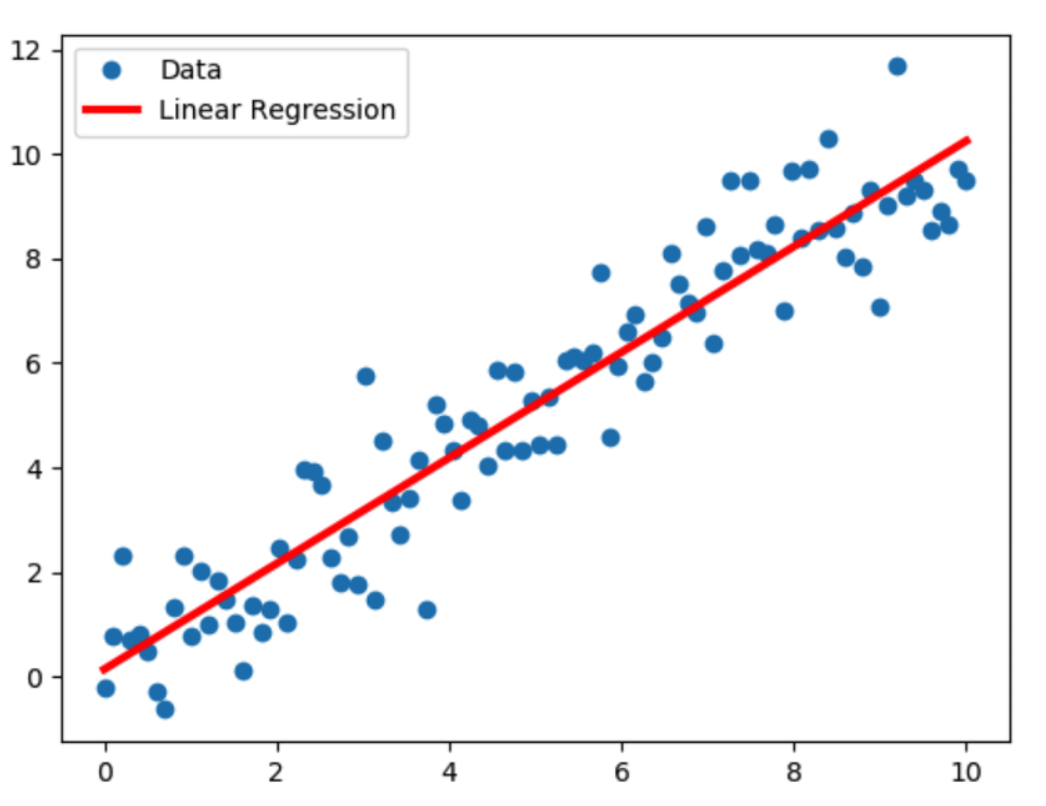

In [98]:
lm = LinearRegression()
# LinearRegression is used to create the model for Linear Regression algorithm
# fit is used to fit the model on the training data
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)
# predict is used to predict the values for the test data
# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
# mean_absolute_error is used to calculate the mean absolute error
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
# mean_squared_error is used to calculate the mean squared error
rmse_lm =  np.sqrt(mse_lm)
# sqrt is used to calculate the square root of the value

In [99]:
print('MAE:', mae_lm) # Mean Absolute Error
print('MSE:', mse_lm) # Mean Squared Error
print('RMSE:', rmse_lm) # Root Mean Squared Error

MAE: 0.3579951405929225
MSE: 0.4758670391380015
RMSE: 0.6898311671256971


## Decision Tree

Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks with the latter being put more into practical application.

It is a tree-structured classifier with three types of nodes. The Root Node is the initial node which represents the entire sample and may get split further into further nodes. The Interior Nodes represent the features of a data set and the branches represent the decision rules. Finally, the Leaf Nodes represent the outcome. This algorithm is very useful for solving decision-related problems.

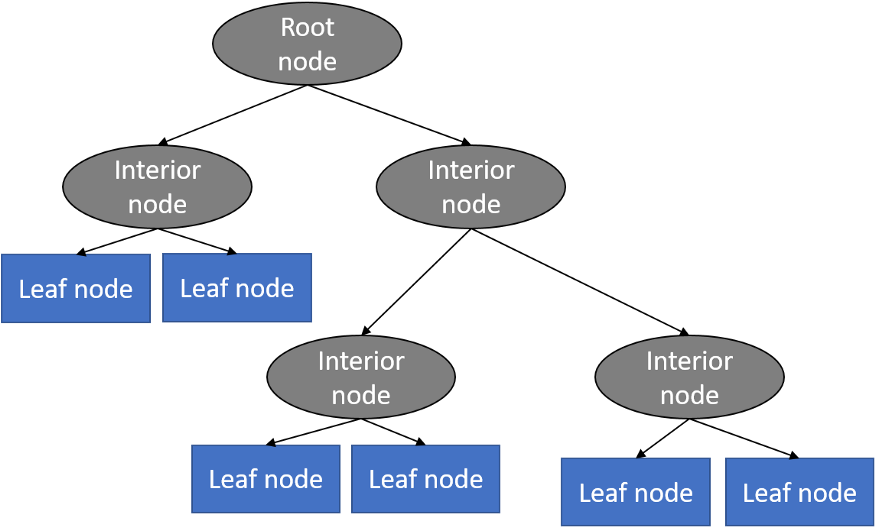

In [101]:
dt = DecisionTreeRegressor(random_state = 100)
# DecisionTreeRegressor is used to create the model for Decision Tree algorithm with random state as 100
dt.fit(X_train, y_train)
# fit is used to fit the model on the training data
dt_prediction = dt.predict(X_test)
# predict is used to predict the values for the test data

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
# mean_absolute_error is used to calculate the mean absolute error
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
# mean_squared_error is used to calculate the mean squared error
rmse_dt =  np.sqrt(mse_dt)
# sqrt is used to calculate the square root of the value

In [102]:
print('MAE:', mae_dt) # Mean Absolute Error
print('MSE:', mse_dt) # Mean Squared Error
print('RMSE:', rmse_dt) # Root Mean Squared Error

MAE: 0.25767891524169967
MSE: 0.4224998679675354
RMSE: 0.6499998984365578


## Support Vector Regressor
Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.

The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample. So let’s now dive deep and understand how SVR works actually.

Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

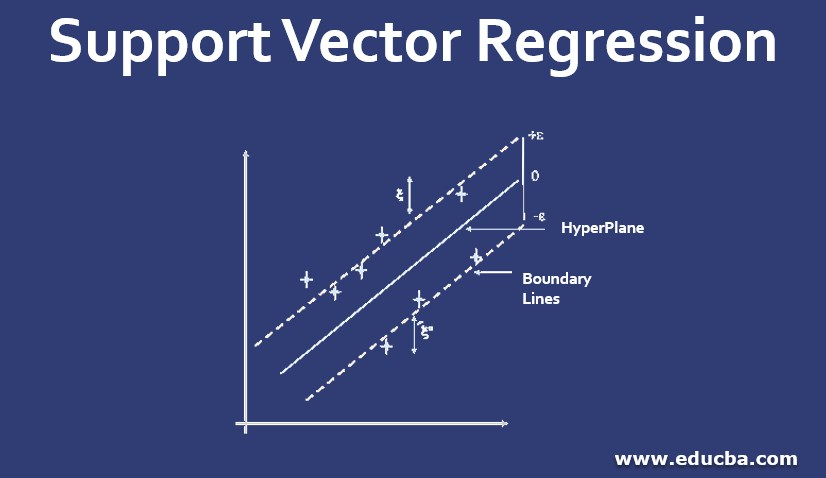


The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

In [104]:
svr = SVR()
# SVR is used to create the model for Support Vector Regression algorithm
svr.fit(X_train, y_train) 
# fit is used to fit the model on the training data
svr_prediction = svr.predict(X_test)
# predict is used to predict the values for the test data

# Evaluation metrics
mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)
# mean_absolute_error is used to calculate the mean absolute error
mse_svr =  metrics.mean_squared_error(y_test, svr_prediction)
# mean_squared_error is used to calculate the mean squared error
rmse_svr =  np.sqrt(mse_svr)
# sqrt is used to calculate the square root of the value

In [105]:
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

MAE: 0.19318449711918328
MSE: 0.3553197101145738
RMSE: 0.5960869987800219


## Random Forest

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

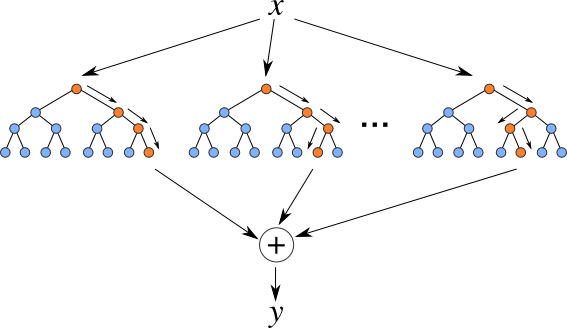

In [107]:
rf = RandomForestRegressor(n_estimators = 100)
# RandomForestRegressor is used to create the model for Random Forest algorithm with n_estimators as 100
rf.fit(X_train, y_train)
# fit is used to fit the model on the training data
rf_prediction = rf.predict(X_test)
# predict is used to predict the values for the test data

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
# mean_absolute_error is used to calculate the mean absolute error
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
# mean_squared_error is used to calculate the mean squared error
rmse_rf =  np.sqrt(mse_rf)
# sqrt is used to calculate the square root of the value

In [109]:
print('MAE:', mae_rf) # Mean Absolute Error
print('MSE:', mse_rf) # Mean Squared Error
print('RMSE:', rmse_rf) # Root Mean Squared Error

MAE: 0.2123427528308436
MSE: 0.3221365427387296
RMSE: 0.5675707380923806


### Lasso Regression (Least Absolute Shrinkage and Selection Operator) -
#### LR is a type of linear regression that involves regularization. It helps in both preventing overfitting and feature selection by adding a penalty term to the regression loss function. Specifically, the penalty term is the L1 norm of the coefficients, which encourages sparse coefficients (some coefficients become exactly zero).

#### Key points about Lasso Regression:
#### Linear regression predicts a continuous target variable.
#### Lasso adds an L1 regularization term to the loss function to reduce the magnitude of the coefficients, which can lead to some coefficients being exactly zero.
#### Feature selection: Since Lasso can set coefficients to zero, it performs automatic feature selection by eliminating less important features from the model.

In [110]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
# Lasso is used to create the model for Lasso Regression algorithm with alpha as 0.1

clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_test)

# Evaluation metrics
mae_clf = metrics.mean_absolute_error(y_test, clf_prediction)
mse_clf =  metrics.mean_squared_error(y_test, clf_prediction)
rmse_clf =  np.sqrt(mse_clf)

In [111]:
print('MAE:', mae_clf)
print('MSE:', mse_clf)
print('RMSE:', rmse_clf)

MAE: 0.32968860404858025
MSE: 0.522145413635148
RMSE: 0.7225963005960853
